In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import datetime

df_stikhi = pd.read_csv('./101120_stikhicats.csv', index_col = 0)
df_manifest = pd.read_csv('./083020_manifestcats.csv', index_col = 0)
df_dnevnik = pd.read_csv('./072420_dnevnikcats.csv', index_col = 0)
df_roman = pd.read_csv('./101820_romancats.csv', index_col = 0)
df_gazet = pd.read_csv('./102920_gazetcats.csv', index_col = 0)

In [12]:
#personxyear = pd.read_csv('./personxyear.csv')
personxyear.loc[[248]].style

,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,165,12,0,0,0,0,0,0,0,0,0,0,0,0,273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
passw = 'aik.9Yor'
engine = sqlalchemy.create_engine('mysql+pymysql://madkehl:' + passw + '@127.0.0.1/prozhito_orig', encoding = 'utf-8')
connection = engine.connect()
metadata = sqlalchemy.MetaData()
notes = sqlalchemy.Table('notes', metadata, autoload = True, autoload_with = engine)
persons = sqlalchemy.Table('persons', metadata, autoload = True, autoload_with = engine)
diary =sqlalchemy.Table('diary', metadata, autoload = True, autoload_with = engine)

def execute(query):
    ResultProxy = connection.execute(query)
    return ResultProxy

def countyear(list_years):
    '''
    SELECT COUNT(YEAR(date)) AS NEWYEAR from notes WHERE YEAR(date) in (1901, 1903, 1906) GROUP BY YEAR(date); 
    **for some reason the year column is less complete than date column
    '''
    
    input_ls = [str(i) for i in list(list_years)]
    input_str = ', '.join(input_ls)
    
    trial = execute('SELECT YEAR(date), COUNT(YEAR(date))FROM notes WHERE YEAR(date) in ('+ (input_str) + ') GROUP BY YEAR(date);')
    ResultSet = trial.fetchall()
    return ResultSet


def countyear_id(list_years):
    '''
    SELECT COUNT(YEAR(date)) AS NEWYEAR from notes WHERE YEAR(date) in (1901, 1903, 1906) GROUP BY YEAR(date); 
    **for some reason the year column is less complete than date column
    '''
    
    input_ls = [str(i) for i in list(list_years)]
    input_str = ', '.join(input_ls)
    
    trial = execute('SELECT YEAR(date), COUNT(YEAR(date)), diary FROM notes WHERE YEAR(date) in ('+ (input_str) + ') GROUP BY YEAR(date), diary;')
    ResultSet = trial.fetchall()
    return ResultSet
    
    

C:\Users\madke\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


In [17]:
def reindex(cats_ls, entry_type, entry_ids, entry_year, diarynum):
    new_ind = []
    new_ids = []
    new_entyr = []
    new_diarnum = []
    for n, m in enumerate(entry_type):
        for i, j  in enumerate(cats_ls):
            if m in j:
                new_ind.append(i)
                new_ids.append(entry_ids.iloc[n])
                new_entyr.append(entry_year.iloc[n])
                new_diarnum.append(diarynum.iloc[n])
                
    return(new_ind, new_ids, new_entyr, new_diarnum)
            

def create_new_df(cats_ls, df, new_names):
    
    
    code = dict(zip(range(len(new_names)), new_names))
    new_type, new_ids, new_entyr, new_diarnum = reindex(cats_ls, df['entry_type'], df['entry_id'], df['entry_year'], df['diarynum'])
    
    new_df = pd.DataFrame({
        
        'diarynum': new_diarnum,
        'entry_id': new_ids,
        'entry_year': new_entyr,
        'new_entry_type': new_type,
        'new_name_type':[code[num] for num in new_type]
        
    })
    return(new_df)

In [11]:
years = range(1899, 2019)
year_count = countyear_id(years)

personxyear = pd.DataFrame(columns=years, index=list(set([i[2] for i in year_count])))

for i in year_count:
    print(i)
    personxyear.at[i[2], i[0]] = i[1]
    

personxyear = personxyear.fillna(0)

personxyear.to_csv('./personxyear.csv')

(1945, 90, 130)
(1933, 1, 234)
(1943, 48, 130)
(1942, 116, 130)
(1968, 5, 129)
(1966, 5, 129)
(1932, 2, 178)
(1931, 54, 178)
(1929, 4, 178)
(1930, 1, 178)
(1928, 3, 178)
(1927, 10, 178)
(1925, 4, 178)
(1922, 40, 131)
(1917, 106, 131)
(1920, 1, 178)
(1921, 106, 131)
(1920, 129, 131)
(1919, 204, 131)
(1918, 280, 131)
(1922, 4, 2)
(1921, 10, 2)
(1920, 3, 2)
(1919, 23, 2)
(1918, 13, 2)
(1917, 5, 2)
(1932, 14, 3)
(1933, 18, 3)
(1934, 67, 3)
(1935, 106, 3)
(1936, 71, 3)
(1937, 53, 3)
(1944, 22, 4)
(1943, 275, 4)
(1942, 59, 4)
(1943, 24, 5)
(1944, 1, 5)
(1951, 3, 5)
(1945, 46, 274)
(1942, 11, 273)
(1941, 13, 273)
(1945, 87, 272)
(1944, 123, 272)
(1943, 100, 272)
(1943, 21, 271)
(1944, 6, 271)
(1941, 19, 272)
(1942, 7, 272)
(1929, 2, 262)
(1939, 2, 261)
(1917, 8, 260)
(1924, 1, 2)
(1937, 2, 2)
(1943, 29, 8)
(1944, 52, 8)
(1945, 23, 8)
(1946, 56, 8)
(1947, 88, 8)
(1948, 70, 8)
(1949, 41, 8)
(1950, 48, 8)
(1951, 33, 8)
(1952, 30, 8)
(1953, 26, 8)
(1954, 48, 8)
(1955, 37, 8)
(1956, 31, 8)
(1957, 

(1926, 19, 424)
(1927, 4, 424)
(1928, 5, 424)
(1929, 8, 424)
(1934, 2, 424)
(1935, 38, 424)
(1956, 5, 202)
(1958, 3, 202)
(1965, 1, 202)
(1971, 2, 202)
(1972, 20, 202)
(1973, 2, 202)
(1974, 2, 202)
(1978, 5, 202)
(1979, 4, 202)
(1981, 1, 202)
(1983, 1, 202)
(1985, 28, 202)
(1986, 16, 202)
(1987, 17, 202)
(1988, 5, 202)
(1989, 8, 202)
(1990, 3, 202)
(1991, 1, 202)
(1992, 2, 202)
(1993, 1, 202)
(1994, 4, 202)
(1995, 9, 202)
(1996, 20, 202)
(1997, 20, 202)
(1998, 33, 202)
(1999, 16, 202)
(2000, 39, 202)
(2001, 16, 202)
(2002, 12, 202)
(2003, 11, 202)
(2005, 91, 202)
(1920, 4, 122)
(1935, 69, 122)
(1936, 2, 122)
(1937, 3, 122)
(1938, 6, 122)
(1939, 21, 122)
(1940, 48, 122)
(1941, 54, 122)
(1942, 68, 122)
(1943, 67, 122)
(1944, 68, 122)
(1945, 78, 122)
(1946, 80, 122)
(1947, 103, 122)
(1948, 118, 122)
(1949, 120, 122)
(1950, 120, 122)
(1951, 11, 122)
(1986, 11, 463)
(1987, 46, 463)
(1988, 92, 463)
(1989, 104, 463)
(1990, 78, 463)
(1942, 2, 233)
(1943, 5, 233)
(1944, 2, 233)
(1978, 26, 464)


(1948, 5, 988)
(1932, 26, 489)
(1933, 3, 489)
(1934, 2, 489)
(1935, 1, 489)
(1936, 132, 489)
(1937, 12, 489)
(1938, 14, 489)
(1939, 8, 489)
(1940, 14, 489)
(1941, 11, 489)
(1942, 1, 489)
(1943, 6, 489)
(1944, 5, 489)
(1947, 2, 489)
(1950, 1, 489)
(1951, 10, 489)
(1953, 2, 489)
(1954, 17, 489)
(1955, 43, 489)
(1957, 2, 489)
(1958, 5, 489)
(1959, 7, 489)
(1961, 2, 489)
(1962, 2, 489)
(1963, 2, 489)
(1964, 3, 489)
(1965, 2, 489)
(1966, 7, 489)
(1967, 7, 489)
(1968, 1, 489)
(1969, 10, 489)
(1970, 2, 489)
(1971, 14, 489)
(1972, 4, 489)
(1973, 21, 489)
(1974, 53, 489)
(1975, 10, 489)
(1977, 1, 489)
(1980, 2, 489)
(1899, 1, 19)
(1900, 1, 19)
(1901, 2, 19)
(1902, 2, 19)
(1903, 9, 19)
(1904, 1, 19)
(1905, 5, 19)
(1907, 12, 19)
(1908, 11, 19)
(1909, 3, 19)
(1911, 25, 19)
(1912, 19, 19)
(1913, 1, 19)
(1914, 16, 19)
(1915, 31, 19)
(1916, 19, 19)
(1919, 19, 19)
(1920, 1, 19)
(1921, 26, 19)
(1922, 45, 19)
(1923, 8, 19)
(1924, 6, 19)
(1928, 33, 19)
(1929, 3, 19)
(1930, 1, 19)
(1931, 3, 19)
(1932, 3, 

(1931, 8, 1700)
(1932, 37, 1700)
(1936, 8, 1700)
(1937, 3, 1700)
(1939, 5, 1700)
(1940, 4, 1700)
(1941, 17, 1700)
(1933, 363, 1639)
(1934, 14, 1394)
(1945, 14, 1552)
(1934, 364, 1639)
(1930, 1, 1798)
(1931, 2, 1798)
(1932, 1, 1798)
(1933, 1, 1798)
(1934, 1, 1798)
(1935, 1, 1798)
(1937, 5, 1798)
(1938, 42, 1798)
(1939, 64, 1798)
(1940, 55, 1798)
(1941, 106, 1798)
(1942, 61, 1798)
(1943, 21, 1798)
(1944, 1, 1798)
(1949, 8, 1737)
(1918, 53, 1789)
(1943, 14, 1799)
(1919, 10, 1694)
(1939, 14, 1721)
(1940, 7, 1760)
(1941, 10, 1760)
(1939, 170, 1658)
(1938, 68, 1658)
(1920, 34, 508)
(1928, 206, 1098)
(1929, 8, 1098)
(1926, 66, 644)
(1925, 1, 644)
(1966, 1, 1543)
(1965, 29, 1543)
(1964, 19, 1543)
(1963, 6, 1543)
(1962, 8, 1543)
(1961, 11, 1543)
(1960, 29, 1543)
(1959, 22, 1543)
(1958, 20, 1543)
(1957, 9, 1543)
(1956, 23, 1543)
(1955, 34, 1543)
(1953, 59, 1543)
(1954, 17, 1543)
(1952, 38, 1543)
(1951, 29, 1543)
(1950, 21, 1543)
(1948, 9, 1543)
(1947, 46, 1543)
(1946, 41, 1543)
(1945, 58, 1543)


(1978, 18, 1923)
(1979, 22, 1923)
(1980, 110, 1923)
(1982, 15, 1923)
(1983, 11, 1923)
(1984, 200, 1923)
(1985, 76, 1923)
(1986, 28, 1923)
(1987, 103, 1923)
(1988, 119, 1923)
(1989, 59, 1923)
(1990, 94, 1923)
(1991, 50, 1923)
(1993, 1, 1923)
(1994, 17, 1923)
(1995, 5, 1923)
(1996, 32, 1923)
(1998, 8, 1923)
(1999, 4, 1923)
(2000, 12, 1923)
(2001, 8, 1923)
(2002, 9, 1923)
(2003, 10, 1923)
(2005, 45, 1923)
(2006, 14, 1923)
(2007, 3, 1923)
(2010, 147, 1923)
(2011, 84, 1923)
(1939, 11, 2332)
(1940, 50, 2332)
(1941, 15, 2332)
(1942, 13, 2332)
(1943, 26, 2332)
(1944, 16, 2332)
(1970, 34, 2264)
(1971, 30, 2264)
(1972, 39, 2264)
(1973, 20, 2264)
(1976, 36, 2264)
(1977, 38, 2264)
(1978, 44, 2264)
(1979, 29, 2264)
(1980, 57, 2264)
(1981, 69, 2264)
(1982, 59, 2264)
(1983, 50, 2264)
(1984, 99, 2264)
(1985, 98, 2264)
(2016, 153, 1857)
(1943, 103, 1832)
(1944, 122, 1832)
(1945, 51, 1832)
(1925, 252, 616)
(1926, 367, 616)
(1927, 377, 616)
(1928, 376, 616)
(1929, 377, 616)
(1930, 119, 616)
(1931, 61, 61

In [24]:
years_df = pd.DataFrame({
    'entry_year': [i[0] for i in year_count],
    'year_totals': [i[1] for i in year_count]
})

In [3]:
years = range(1899, 2019)
year_count = countyear(years)

years_df = pd.DataFrame({
    'entry_year': [i[0] for i in year_count],
    'year_totals': [i[1] for i in year_count]
})

In [4]:
years_df.to_csv('./year_totals.csv')

**excluded
dnev_notes = 1, 16, 30, 31, 3, 33
gaz_ titles numbers petersburgskaia gazeta

In [3]:
dnev_rout = [10,11,12,13, 14,15, 34, 8]
dnev_interp = [18,28,2,20]
dnev_lit = [19,22,32,7,9, 17]
dnev_spir = [5, 35, 29, 23, 26, 21]
dnev_form = [27, 4, 24, 25, 6]
dnev_cats = [dnev_rout, dnev_interp, dnev_form, dnev_lit, dnev_spir]
dnev_names = ['Routine','Form', 'Interpersonal', 'Literary', 'Spirit']

stix_read = [0]
stix_test = [1]
stix_form = [2]
stix_sovrev = [3]
stix_cit = [4]
stix_judg = [5,6]
stix_cont = [7]
stix_exp = [8]
stix_interp = [9,10]
stix_pro = [11]
stix_rec = [12]
stix_cats = [stix_read, stix_form,  stix_interp, stix_cont,stix_cit, stix_pro, 
             stix_sovrev, stix_rec,  stix_test, stix_judg,stix_exp]
stix_names = ['Reading','Form', 'Interpersonal', 'Content', 'Citations', 'Professional Activity', 
              'Soviet Revolution','Recitation', 'Testimony', 'Judgement', 'Expression']


gaz_op = [0]
gaz_rout = [4]
gaz_persmen = [5] 
gaz_cult = [6]
gaz_proact = [7]
gaz_info = [8]
gaz_form = [9]
gaz_pol = [10]
gaz_war = [11]
gaz_cats = [ gaz_rout, gaz_form, gaz_persmen, gaz_proact,
            gaz_pol, gaz_war, gaz_info, gaz_cult, gaz_op]
gaz_names = ['Routine', 'Form', 'Personal Mentions', 'Professional Activity',
            'Politics', 'War', 'Information', 'Culture', 'Opinions']

rom_cont = [0]
rom_histfict = [1]
rom_interp = [2]
rom_media= [3]
rom_judg = [4]
rom_pro = [5]
rom_pub = [6]
rom_sovnov = [7]   
rom_litmod = [8]
rom_form = [9]
rom_cats = [rom_form, rom_cont, rom_interp, rom_media, rom_pro, 
            rom_pub, rom_sovnov, rom_histfict, rom_litmod, rom_judg]
rom_names = ['Form', 'Content', 'Interpersonal', 'In Media', 'Professional Activity',
            'Publication', 'Soviet Novel', 'Historical Fiction', 'Literary Models', 'Judgement']

man_textobj = [0]
man_interp = [1]
man_form = [2]
man_remin = [3]
man_hist = [4] 
man_inst = [5]
man_revhist = [6] 
man_mon = [7,8]

man_cats = [man_form, man_interp, man_hist, man_revhist, man_mon, man_textobj, man_remin]

man_names = ['Form', 'Interpersonal', 'History', 'Revolutionary History', 'Monarchy',
            'Textual Object', 'Reminiscence']

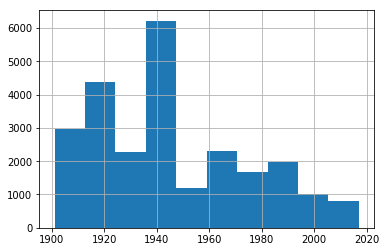

In [30]:
#new_dnev = create_new_df(dnev_cats, df_dnevnik, dnev_names)
%matplotlib inline
new_gaz['entry_year'].hist()

In [21]:
new_dnev.to_csv('./110920_dnevnik.csv')

In [23]:
new_stix = create_new_df(stix_cats, df_stikhi, stix_names)

new_stix.to_csv('./110920_poetry.csv')

In [24]:
new_rom = create_new_df(rom_cats, df_roman, rom_names)

new_rom.to_csv('./110920_roman.csv')

In [25]:
new_gaz = create_new_df(gaz_cats, df_gazet, gaz_names)

new_gaz.to_csv('./110920_news.csv')

In [26]:
new_man = create_new_df(man_cats, df_manifest, man_names)

new_man.to_csv('./110920_man.csv')

In [13]:
new_rom

,diarynum,entry_id,entry_year,new_entry_type,new_name_type
0,3.0,895,1935.0,8,Literary Models
1,3.0,721,1933.0,1,Content
2,3.0,865,1935.0,4,Professional Activity
3,3.0,908,1936.0,9,Judgement
4,3.0,865,1935.0,4,Professional Activity
...,...,...,...,...,...
7137,3.0,865,1935.0,5,Publication
7138,3.0,867,1935.0,6,Soviet Novel
7139,2.0,1476,1918.0,0,Form
7140,3.0,733,1934.0,3,In Media
